# **Fake News Detection**

> Introduction to the Fake news dataset

> Flow of Project

#### __Fake News__
Fake news refers to false or misleading information presented as if it were true, often spread through various media outlets, including social media, websites, television, and more. This information is intentionally fabricated to deceive readers, viewers, or listeners, and it can take various forms, such as articles, images, videos, and memes.

Fake news can have several purposes, including:

1. **Misinformation:** Deliberately spreading false information to mislead or confuse people about certain events, issues, or individuals.

2. **Disinformation:** Sharing fabricated content to promote a specific agenda, shape public opinion, or create chaos within a society.

3. **Clickbait:** Creating sensational and false headlines to attract clicks and generate advertising revenue.

4. **Satire:** Presenting fictional stories or content as a form of humor or satire, often to criticize or comment on real-world issues.

5. **Hoaxes:** Spreading false stories or events that appear to be real, often causing panic or confusion.

The spread of fake news can have serious consequences, including the distortion of public perception, erosion of trust in reliable sources, and even influencing political outcomes. In recent years, the rapid spread of fake news has been facilitated by the ease of sharing information on social media platforms, making it crucial for consumers to critically evaluate the sources and credibility of the information they encounter. Fact-checking, critical thinking, and relying on reputable news sources are essential strategies for combating the impact of fake news.

### __Flow of Project__

1. Importing the Required Libraries
2. Importing the dataset   _Downloaded from kaggle_
3. Create the class
4. Plotting the class
5. Preprocessing and Cleaning
    - Clean Text
    - Remove Accented words
6. Feature Engineering
    - Train-Test Split
    - TFIDF Vectorization
7. Classififation Models
    - Logistics Regression
    - Random Forest Classifier
    - Decision Tree Classifier
8. Classification Report
9. Confusion Matrix
10. Manual Testing

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex

import spacy

import emoji

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

import re
import contractions
import string
import unicodedata

In [2]:
df_fake=pd.read_csv('fake.csv')
df_true=pd.read_csv('True.csv')

In [3]:
print(df_fake.shape, df_true.shape)

(23481, 4) (21417, 4)


In [4]:
df_fake['Class']=0
df_true['Class']=1

In [5]:
df = pd.concat([df_fake, df_true], ignore_index=True)

In [6]:
# Shuffling the data
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
df.shape

(44898, 5)

In [8]:
df.head()

,title,text,subject,date,Class
0,‘Pharma Bro’ Just Yelled This At Hillary To R...,You may have heard that Hillary Clinton had a ...,News,"September 11, 2016",0
1,U.S. vote authorities warned to be alert to Ru...,(Reuters) - U.S. intelligence and law enforcem...,politicsNews,"October 21, 2016",1
2,World's largest amphibious aircraft makes maid...,BEIJING (Reuters) - China s domestically devel...,worldnews,"December 24, 2017",1
3,"Putin, Trump to discuss North Korea on Tuesday...",MOSCOW (Reuters) - Russian President Vladimir ...,worldnews,"November 21, 2017",1
4,Court ruling favors Ghana in ocean border disp...,DAKAR/ACCRA (Reuters) - The International Trib...,worldnews,"September 23, 2017",1


In [9]:
df = df.drop(labels=['title','subject','date'],axis=1)

In [10]:
df.head()

,text,Class
0,You may have heard that Hillary Clinton had a ...,0
1,(Reuters) - U.S. intelligence and law enforcem...,1
2,BEIJING (Reuters) - China s domestically devel...,1
3,MOSCOW (Reuters) - Russian President Vladimir ...,1
4,DAKAR/ACCRA (Reuters) - The International Trib...,1


In [11]:
df.isnull().sum()

text     0
Class    0
dtype: int64

### Plotting the class

<Axes: xlabel='Class', ylabel='count'>

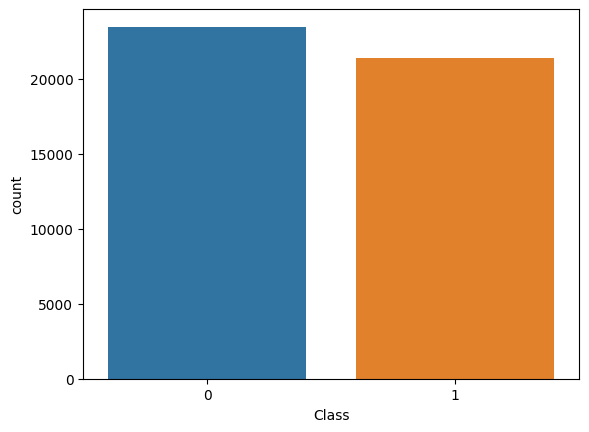

In [12]:
sns.countplot(data = df,x = "Class")

### Cleaning the Data

In [13]:
# Defining the function which cleans the data

def clean_text(text):
    text = emoji.demojize(text)  # fix emojis
    text = contractions.fix(text)  # fix contractions
    text = re.sub(r'[^\x00-\x7f]', r'', text)  # remove strange fonts
    text = re.sub(r"\d+", "number", text)  # replace numbers with "number"
    text = re.sub(r'[^\w\s]', '', text)  # remove non-alphanumeric chars
    text = text.replace('_', ' ')  # replace underscores with space
    text = re.sub(r'[^A-Z a-z 0-9-]+','', text)
    text = text.strip()  # strip extra spaces
    text = text.lower()  # lowering the text
   
    return text

In [14]:
%%time
df['text'] = df['text'].apply(clean_text)

CPU times: total: 2min 44s
Wall time: 3min 17s


In [15]:
# Removing Accented words if exist

def remove_accented(x):
    x = unicodedata.normalize("NFKD", x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [16]:
df['text'] = df['text'].apply(remove_accented)

### Train Test Split

In [17]:
x = df['text']
y = df['Class']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

### TFIDF Vector

In [18]:
tf = TfidfVectorizer()
xv_train = tf.fit_transform(x_train)
xv_test = tf.transform(x_test)

#### Logistic Regression

In [19]:
lr = LogisticRegression()
lr.fit(xv_train,y_train)

LogisticRegression()

In [20]:
lr_pred = lr.predict(xv_test)

In [21]:
lr.score(xv_test,y_test)

0.9867112100965107

In [22]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7009
           1       0.99      0.99      0.99      6461

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



#### Random Forest Classifier

In [23]:
rf = RandomForestClassifier()
rf.fit(xv_train,y_train)

RandomForestClassifier()

In [24]:
rf_pred = rf.predict(xv_test)

In [25]:
rf.score(xv_test,y_test)

0.9839643652561247

In [26]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7009
           1       0.98      0.99      0.98      6461

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470



#### Decision Tree Classifier

In [29]:
dc = DecisionTreeClassifier()
dc.fit(xv_train,y_train)

DecisionTreeClassifier()

In [30]:
dc_pred = dc.predict(xv_test)

In [31]:
dc.score(xv_test,y_test)

0.9960653303637713

In [32]:
print(classification_report(y_test,dc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7009
           1       1.00      1.00      1.00      6461

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



### Confusion Matrix

In [33]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True,fmt = "d", cmap = "Blues", ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('Actual labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['Fake', 'Not Fake']); ax.yaxis.set_ticklabels(['Fake', 'Not Fake'])

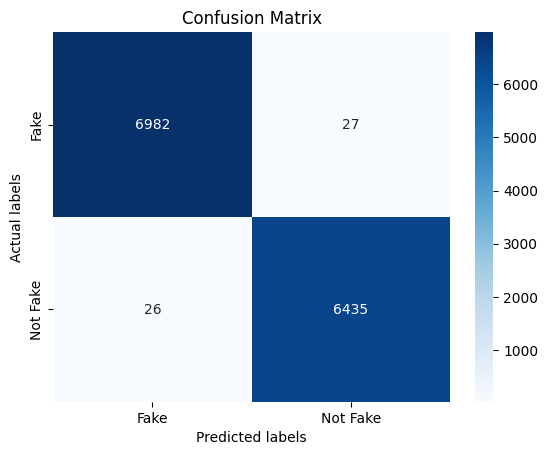

In [34]:
# ploting confusion matrix for the highest accuracy model
plot_confusion_matrix(y_test,dc_pred)

#### Manual Testing of the Model
For manual testing encoding the labels to the news where if news is not true encoding "Fake News" while if the news is true encoding "Not a Fake News"

In [35]:
def output_labels(n):
    if n == 0:
        return "Fake News"
    if n == 1:
        return "Not a Fake News"
    
def Manual_testing(news):
    testing_news = {"text": [news]}
    news_df_test = pd.DataFrame(testing_news)
    news_df_test['text'] = news_df_test['text'].apply(clean_text)
    news_test = news_df_test['text']
    news_xv_test = tf.transform(news_test)
    LR_pred = lr.predict(news_xv_test)
    RF_pred = rf.predict(news_xv_test)
    DC_pred = dc.predict(news_xv_test)
    return print("\n\nLogisticRegression: {} \nRandom Forest: {} \nDecisionTree: {}".format(output_labels(LR_pred[0]),
                                                                                            output_labels(RF_pred[0]),
                                                                                            output_labels(DC_pred[0])))

In [36]:
news = str(input())
Manual_testing(news)

 	title 99	 OOPS: Trump Judicial Nominee Didn’t Tell Congress About Marriage To White House Attorney




LogisticRegression: Fake News 
Random Forest: Fake News 
DecisionTree: Fake News


In [37]:
news = str(input())
Manual_testing(news)

 	text 112	WASHINGTON (Reuters) - The Republican-controlled U.S. House of Representatives is expected to vote on sweeping tax legislation early Tuesday afternoon, aides said, bringing President Donald Trump’s goal of overhauling the U.S. tax system one step closer to fruition. The vote, on a final bill agreed by House and Senate Republicans last week, could come around 1:30 p.m. EST (1830 GMT), the aides said.  Both the House and Senate must approve the measure before Trump can sign it into law. The Senate is expected to vote on the bill as early as Tuesday but must complete 10 hours of debate before acting. It was not clear when debate would begin.     




LogisticRegression: Not a Fake News 
Random Forest: Not a Fake News 
DecisionTree: Not a Fake News
